In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [3]:
import pandas as pd
import numpy as np

## Importacion de data y funciones

In [4]:
data = pd.read_csv('train_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11773348 entries, 0 to 11773347
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   pickup_datetime    object 
 2   pickup_latitude    float64
 3   pickup_longitude   float64
 4   dropoff_latitude   float64
 5   dropoff_longitude  float64
 6   passenger_count    int64  
 7   fare_amount        float64
 8   day                int64  
 9   hour               float64
 10  week               int64  
 11  trayecto_nocturno  int64  
 12  hora_punta         int64  
 13  year               int64  
 14  aeropuerto         int64  
 15  day_of_month       int64  
dtypes: float64(6), int64(8), object(2)
memory usage: 1.4+ GB


In [ ]:
# ax = data.plot.scatter(x="pickup_latitude", y="pickup_longitude", color="DarkBlue", label='pickup')
# data.plot.scatter(x="dropoff_latitude", y="dropoff_longitude", color="DarkGreen", label='dropoff', ax=ax)

In [6]:
#features = ['pickup_latitude',	'pickup_longitude',	'dropoff_latitude',	'dropoff_longitude']
features2 = ['pickup_latitude',	'pickup_longitude',	'dropoff_latitude',	'dropoff_longitude', 'hour']
#features3 = ['pickup_latitude',	'pickup_longitude',	'dropoff_latitude',	'dropoff_longitude', 'week', 'hour', 'day','hora_punta']

X = data[features2]

#X = data.drop(columns=['fare_amount','key',	'pickup_datetime'])
y = data['fare_amount']

print(X.shape)
print(y.shape)

(11773348, 5)
(11773348,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8241343, 5)
(8241343,)
(3532005, 5)
(3532005,)


In [8]:
import matplotlib.pyplot as plt

def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

## Adaboost

Consiste en crear varios predictores sencillos en secuencia, de tal manera que el segundo ajuste bien lo que el primero no ajustó, que el tercero ajuste un poco mejor lo que el segundo no pudo ajustar y así sucesivamente.

Los mejores parametros a considerar son:
n_estimators y learning_rate. En uno de los parametros se incluye tambien el tipo de modelo sobre el cual estará basado, en este caso se elegirá DesicionTreeRegressor como base para el modelo(es el que está por defecto), sobre el cual se pueden elegir modificar diversos parametros, como max_depth entre otros.

Se usaron las caracteristicas `pickup_latitude` , `pickup_longitude`, `dropoff_latitude`, `dropoff_longitude`, `aeropuerto`.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

abr = AdaBoostRegressor(n_estimators = 100 , learning_rate = 0.1)

abr.fit(X_train, y_train) 

abr.fit(X_train, y_train)
score = abr.score(X_test, y_test)
print(score)

y_pred = abr.predict(X_test)

mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

comp = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
print(comp)

0.5352681920671574
MSE : 50.57334906654093
RMSE : 7.1114941514804695
r2_score : 0.5352681920671574
          y_test     y_pred
10247211    16.5  14.057666
11390553     4.5  14.057666
4366652      8.0  14.057666
7098284      5.0  14.057666
1500070      9.0  14.057666
...          ...        ...
2297637     10.0  14.057666
5652878      6.0  14.057666
3724883      6.0  15.531998
397052      12.0  14.057666
10070607     4.5  14.057666

[1126274 rows x 2 columns]


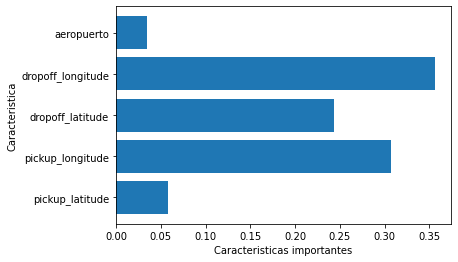

In [ ]:
dibuja_caracteristicas_importantes(abr)

Se usaron todas las caracteristicas menos `fare_amount` , `pickup_datetime`, `key`.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

abr = AdaBoostRegressor(n_estimators = 100 , learning_rate = 0.1)

abr.fit(X_train, y_train) 

abr.fit(X_train, y_train)
score = abr.score(X_test, y_test)
print(score)

y_pred = abr.predict(X_test)

mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

comp = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
print(comp)

0.5181808506650829
MSE : 52.43283891982912
RMSE : 7.241052335111874
r2_score : 0.5181808506650829
          y_test     y_pred
10247211    16.5  14.352223
11390553     4.5  14.352223
4366652      8.0  14.352223
7098284      5.0  14.352223
1500070      9.0  14.352223
...          ...        ...
2297637     10.0  14.352223
5652878      6.0  14.352223
3724883      6.0  15.749820
397052      12.0  14.352223
10070607     4.5  14.352223

[1126274 rows x 2 columns]


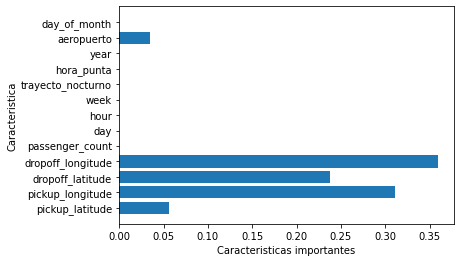

In [ ]:
dibuja_caracteristicas_importantes(abr)

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
            'n_estimators' :[50, 100, 250, 500, 750, 1000],
            'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1],
            'loss' : ['linear', 'square', 'exponential']
            }

base_grid = GridSearchCV(estimator=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4)),
                        param_grid=param_grid, n_jobs=40, return_train_score=True)

base_grid.fit(X_train, y_train) 
base_best_mod = base_grid.best_estimator_

base_best_mod.fit(X_train, y_train)
score = base_best_mod.score(X_test, y_test)
print(score)

In [ ]:
from sklearn.metrics import r2_score

y_pred = base_best_mod.predict(X_test)

mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 13.40507256998187
RMSE : 3.661293838246511
r2_score : 0.3112557151514119


In [ ]:
comp = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

In [ ]:
dibuja_caracteristicas_importantes(base_best_mod)

#### Extra

In [ ]:
from sklearn.model_selection import cross_val_score

for depth in range (2,7):
     tree_regressor=DecisionTreeRegressor(max_depth=depth,random_state=1)
     if tree_regressor.fit(X_train,y_train).tree_.max_depth<depth:
         break
     score=np.mean(cross_val_score(tree_regressor,X,y,scoring='neg_mean_squared_error', n_jobs=1))
     print(depth, score)

2 -48.73440691593187
3 -40.04156454627229
4 -35.42226891226465
5 -31.567669203553532
6 -29.21120159128974


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

param_grid={
            'n_estimators' :[100, 250, 500, 750],
            'learning_rate' :[0.001, 0.01, 0.1, 1],
            'random_state':[1]
            }

base_grid = GridSearchCV(estimator=AdaBoostRegressor(DecisionTreeRegressor(max_depth=6)),
                        param_grid=param_grid, n_jobs=40, return_train_score=True)

base_grid.fit(X_train, y_train) 
base_best_mod = base_grid.best_estimator_

base_best_mod.fit(X_train, y_train)
score = base_best_mod.score(X_test, y_test)
print(score)
print(base_best_mod.best_params_)

## Lightgbm

LightGBM es un marco de mejora de gradientes que utiliza algoritmos de aprendizaje basados ​​en árboles. Está diseñado para ser distribuido y eficiente con las siguientes ventajas:

* Velocidad de entrenamiento más rápida y mayor eficiencia.
* Menor uso de memoria.
* Mejor precisión.
* Soporte de aprendizaje en paralelo, distribuido y GPU.
* Capaz de manejar datos a gran escala.

LightGBM divide el árbol en forma de hojas en lugar de otros algoritmos de impulso que crecen a nivel del árbol. Elige la hoja con la máxima pérdida delta para crecer. Dado que la hoja es fija, el algoritmo de hoja tiene una pérdida menor en comparación con el algoritmo de nivel. El crecimiento de los árboles por hojas puede aumentar la complejidad del modelo y puede conducir a un sobreajuste en pequeños conjuntos de datos.

A continuación se muestra una representación esquemática del crecimiento de los árboles en forma de hoja: 



Los hiperparámetros más influyentes son: 
  max_depth, n_estimators y learning_rate.


### Prueba con un modelo

In [ ]:
!pip install lightgbm

In [9]:
from lightgbm.sklearn import LGBMRegressor
import multiprocessing
from sklearn import metrics
from sklearn.metrics import r2_score
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import random

In [14]:
#lgbm = LGBMRegressor(boosting_type='gbdt',  max_depth= 5, learning_rate=0.1, n_estimators=1000, subsample=0.5,random_state=1, n_jobs=multiprocessing.cpu_count() - 1)
lgbm = LGBMRegressor(boosting_type='gbdt',  max_depth= 7, learning_rate=0.1, n_estimators=1000, subsample=0.5,random_state=1, n_jobs=multiprocessing.cpu_count() - 1)
lgbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

In [15]:
score = lgbm.score(X_test, y_test)
print("score :",score)

y_pred = lgbm.predict(X_test)

mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

score : 0.8974132606927763
MSE : 10.956263811435077
RMSE : 3.3100247448372766
r2_score : 0.8974132606927763


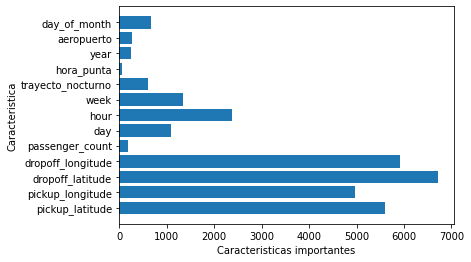

In [16]:
dibuja_caracteristicas_importantes(lgbm)

Todas las caracteristicas con el mejor modelo resultado de la busqueda aleatoria.

In [21]:
model = LGBMRegressor(boosting_type=['gbdt'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

model.fit(X_train_s, y_train)
score = model.score(X_test_s, y_test)
print(score)

0.8974128939904997


Con Scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [11]:
lgbm_s = LGBMRegressor(boosting_type=['gbdt'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)
lgbm_s.fit(X_train_s, y_train)

LGBMRegressor(boosting_type=['gbdt'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

In [12]:
score = lgbm_s.score(X_test_s, y_test)
print("score :",score)

y_pred = lgbm_s.predict(X_test)

mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

score : 0.8933640492833465
MSE : 254.90746894841033
RMSE : 15.965821900184478
r2_score : -1.386774042180087


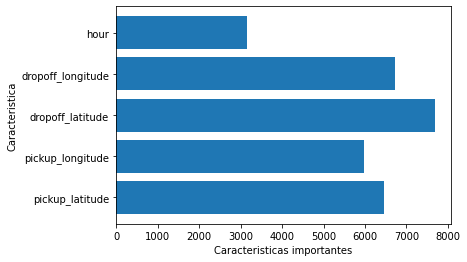

In [13]:
dibuja_caracteristicas_importantes(lgbm_s)

### Busqueda aleatoria

In [17]:
boosting_type = ['gbdt']
best_score = -1
best_model = LGBMRegressor()

for i in range(12):
    n_estimators= random.choice([100, 500, 750 ,1000])
    max_depth = random.choice([3, 5, 7])
    subsample = random.choice([0.5, 1])
    learning_rate = random.choice([0.001, 0.01, 0.1])

    model = LGBMRegressor(boosting_type=boosting_type,  max_depth= max_depth, learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample,random_state=1, n_jobs=multiprocessing.cpu_count() - 1)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score 
        best_model = model
        print("Mejor score: {} \nModelo: {}".format(score, model))

Mejor score: 0.6488191195415001 
Modelo: LGBMRegressor(boosting_type=['gbdt'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.001, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)
Mejor score: 0.8888296855530071 
Modelo: LGBMRegressor(boosting_type=['gbdt'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=5,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)
Mejor score: 

In [18]:
#res = cross_validate(best_model, X_train, y_train)
#print(pd.DataFrame(res))
score = model.score(X_train, y_train)
print("Score entrenamiento: ",score)

score = model.score(X_test, y_test)
print("Score prueba: ",score)

y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = metrics.r2_score(y_test, y_pred)
print("r2_score :", r2)

# comp = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
# print(comp)

Score entrenamiento:  0.85660492760096
Score prueba:  0.8559937145645446
MSE : 15.379871359498152
RMSE : 3.921717909220161
r2_score : 0.8559937145645446


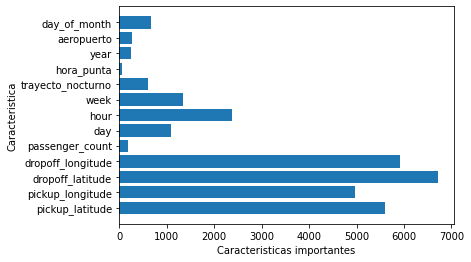

In [19]:
dibuja_caracteristicas_importantes(best_model)

### GridSearchCV

In [17]:
param_grid = {'n_estimators'     : [500, 750, 1000],
              'max_depth'        : [3, 5, 7],
              'learning_rate'    : [0.001, 0.01, 0.1],
             }

grid = GridSearchCV(
        estimator  = LGBMRegressor(boosting_type = 'gbdt', random_state = 1 , n_jobs = multiprocessing.cpu_count() - 1),
        param_grid = param_grid,
        return_train_score = True,
        verbose = 2
       )

grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  27.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.9s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  26.4s
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  26.3s
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  26.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  26.4s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, total=  39.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, total=  38.9s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, total=  39.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 144.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=39, num_leaves=31,
                                     objective=None, random_state=1,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [500, 750, 1000]},
         

In [18]:
score = grid.score(X_train, y_train)
print("Score entrenamiento: ",score)

score = grid.score(X_test, y_test)
print("Score prueba: ",score)

y_pred = grid.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = metrics.r2_score(y_test, y_pred)
print("r2_score :", r2)

Score entrenamiento:  0.8954485820575061
Score prueba:  0.8934558041641824
MSE : 11.378920170748994
RMSE : 3.373265505522652
r2_score : 0.8934558041641822
